## Market Basket Analysis

### Introduction
### Data Preparation
### Exploratory Data Analysis(Visualization)
### Insights
### Recommendation and Conclusion

# Introduction


 ### Overview

This project harnesses Market Basket Analysis techniques in Python to derive meaningful insights from transactional data. The primary objective is to comprehend customer buying behaviors, reveal connections between various products, and extract actionable intelligence to enhance targeted marketing strategies.

### Key Features

#### Feature Engineering

Utilizing Python, the dataset undergoes feature engineering, primarily involving the consolidation of items per customer per day into 'CustomerTransaction' baskets. 


#### Data Exploration

The exploration phase delves into understanding the dataset's structure and characteristics. Below is an example of exploring key columns:


Summary statistics for 'Member_Number', 'ItemDescription', and 'Date'


#### Apriori Algorithm

Application of the Apriori algorithm to unveil frequent itemsets that serve as the foundation for generating association rules:

from mlxtend.frequent_patterns import apriori, association_rules

# Generating frequent itemsets
frequent_itemsets = apriori(data, min_support=0.03, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)


### Research Questions

### Transaction Frequency:

What is the overall distribution of transaction frequencies per Member_number?
How does the transaction frequency vary over different dates or time periods?
Can we identify any seasonality or trends in transaction counts?

### Popular Products:
What are the most frequently purchased items across all transactions?
How do the sales of different items vary over time?

### Association Rules and Product Co-occurrences:
What are the most common item combinations purchased together by Member_number?
Can we identify any significant patterns or associations between specific items in transactions?
How strong are the relationships between different itemDescription pairs?



### Data Preparation

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

In [3]:
#check for the dataset
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [5]:
# view dimensions of dataframe.
df.shape

(38765, 3)

In [6]:
# checking for the general statistics summary of the dataset
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
#checking for the number of columns,rows and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
#checking for value coint
df.value_counts()

Member_number  Date        itemDescription 
1994           11-03-2015  whole milk          4
4372           30-07-2015  other vegetables    3
3518           08-02-2014  whole milk          3
3055           18-08-2015  other vegetables    3
2061           27-12-2015  tropical fruit      3
                                              ..
2351           18-09-2014  instant coffee      1
2352           05-05-2015  pastry              1
                           sausage             1
               27-03-2014  misc. beverages     1
5000           16-11-2014  other vegetables    1
Name: count, Length: 38006, dtype: int64

In [9]:
#checking for duplicating number
df.duplicated().sum()

759

In [10]:
#checking for missing number
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
#converting date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_21656\2767658389.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
# checking for unique count in each column
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

### Exploratory Data Analysis(Visualization)

In [13]:
df_item = df.groupby(by = 'itemDescription').size().reset_index(name='frequency').sort_values(by = 'frequency', ascending = False).head(10)

In [14]:
df_item.head()

,itemDescription,frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334


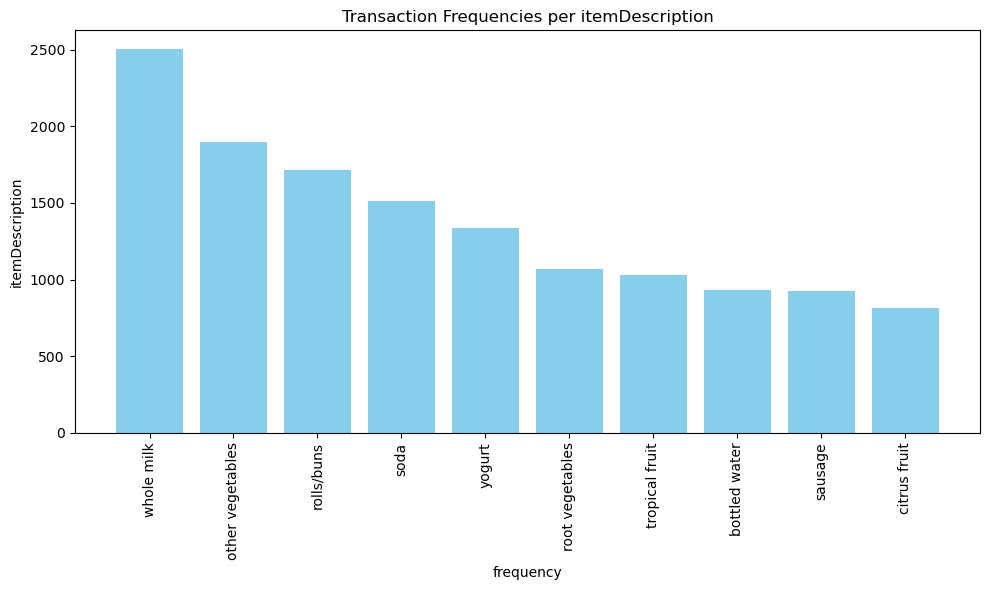

In [15]:
# Creating a bar chart to visualize transaction counts per Member_number
plt.figure(figsize=(10, 6))
plt.bar(df_item['itemDescription'], df_item['frequency'], color='skyblue')
plt.xlabel('frequency')
plt.ylabel('itemDescription')
plt.title('Transaction Frequencies per itemDescription')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()


1.from the graph above, whole milk represent the products that are most commonly purchased.

2.citrus fruit indicate less frequent purchases. These items may be niche products or less popular among customers.

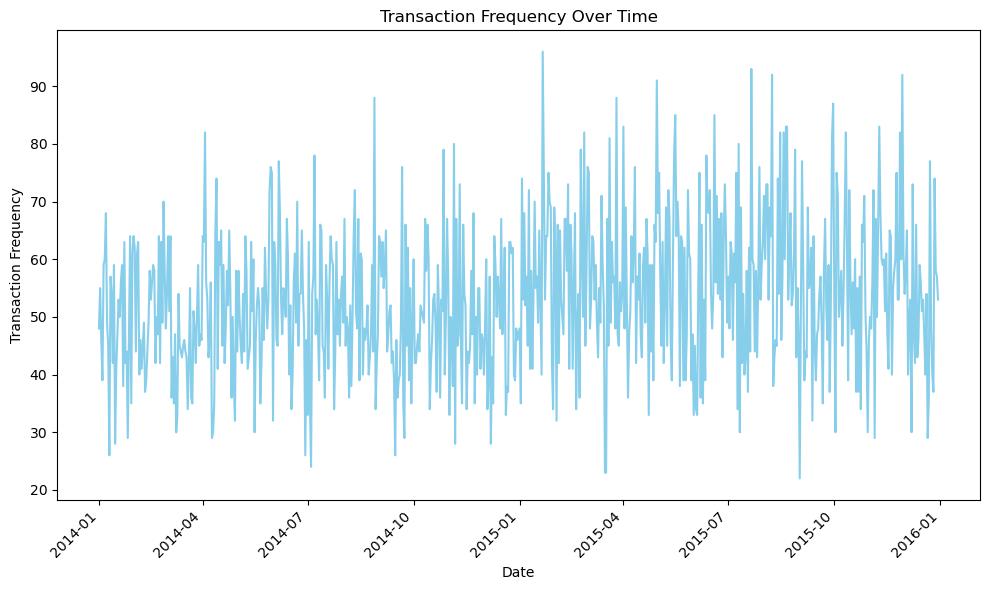

In [16]:
# Group transactions by date and count the number of transactions for each date
transaction_freq_over_time = df.groupby('Date').size()

# Create a line plot or bar chart to visualize transaction frequency over time
plt.figure(figsize=(10, 6))
transaction_freq_over_time.plot(kind='line', color='skyblue')
# Or use bar chart: transaction_freq_over_time.plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Transaction Frequency')
plt.title('Transaction Frequency Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

he plot showcases how transaction frequency fluctuates over time. It can reveal recurring patterns, such as daily, weekly, or monthly trends in transaction volumes. For instance, you might observe regular peaks during weekends or specific days of the week.

In [17]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold by month')]

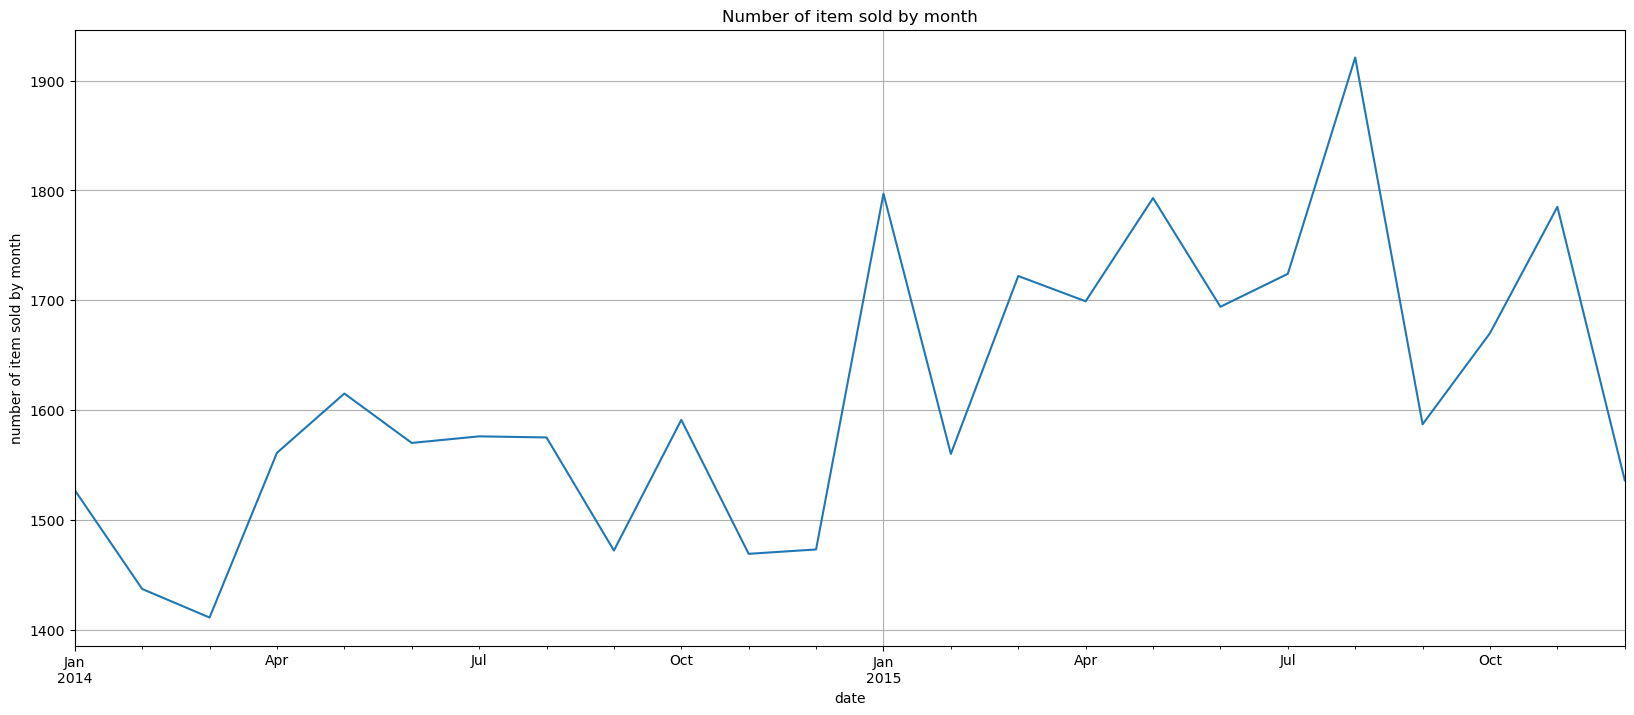

In [18]:
df_date.resample("M")["itemDescription"].count().plot(figsize = (20,8), grid= True, title ="Number of item sold by month").set(xlabel="date", ylabel="number of item sold by month")

The plot showcases the number of items sold per month, allowing for the observation of any trends or fluctuations in sales over the months. where there sharp increase in sale both in  January and August 2015 respectively 

[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold by week')]

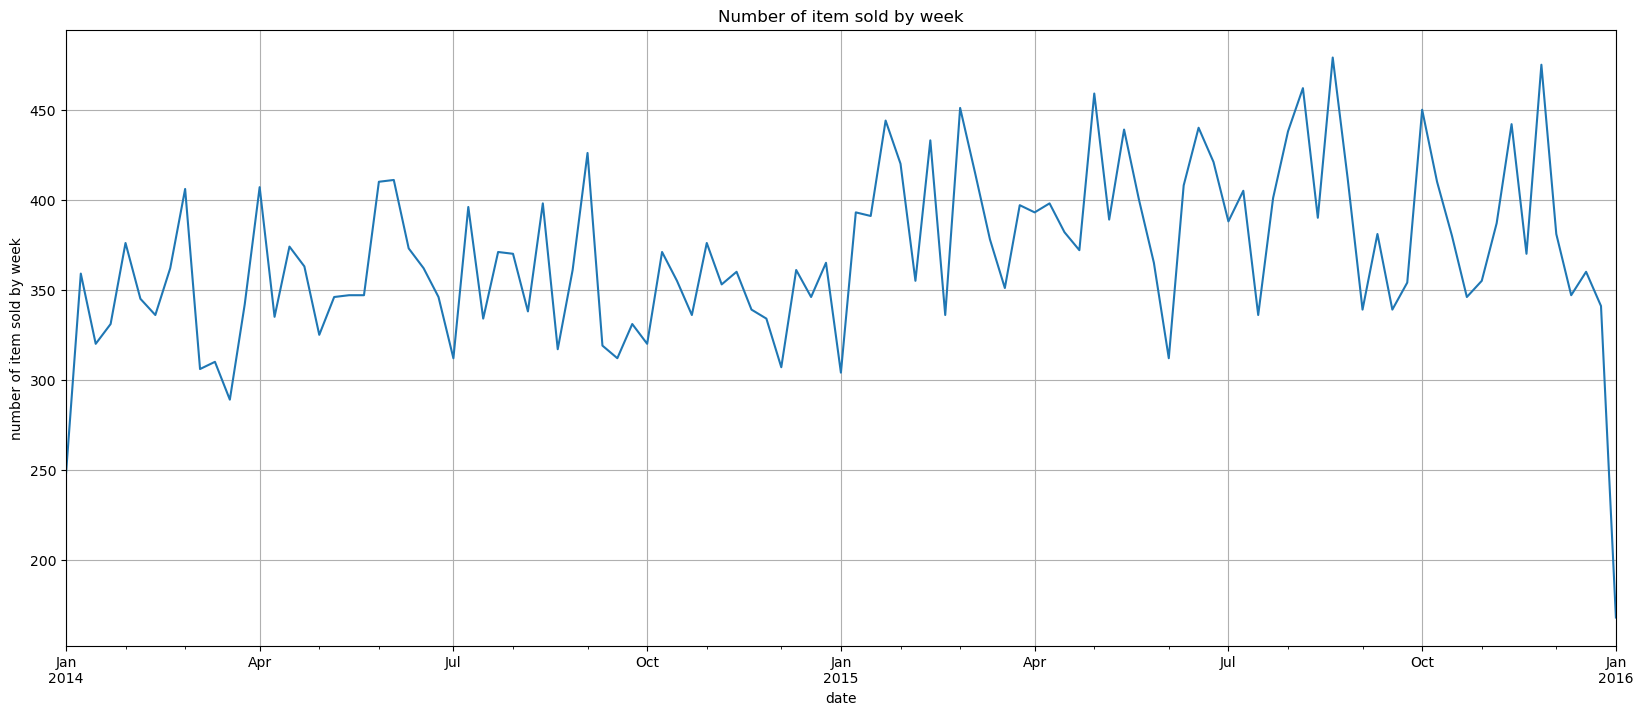

In [19]:
df_date.resample("W")["itemDescription"].count().plot(figsize = (20,8), grid= True, title ="Number of item sold by week").set(xlabel="date", ylabel="number of item sold by week")

The plot shows the number of items sold per week,I observe the sales trends are more at granular level. This granularity reveal short-term fluctuations or patterns that might not be visible at a monthly level.

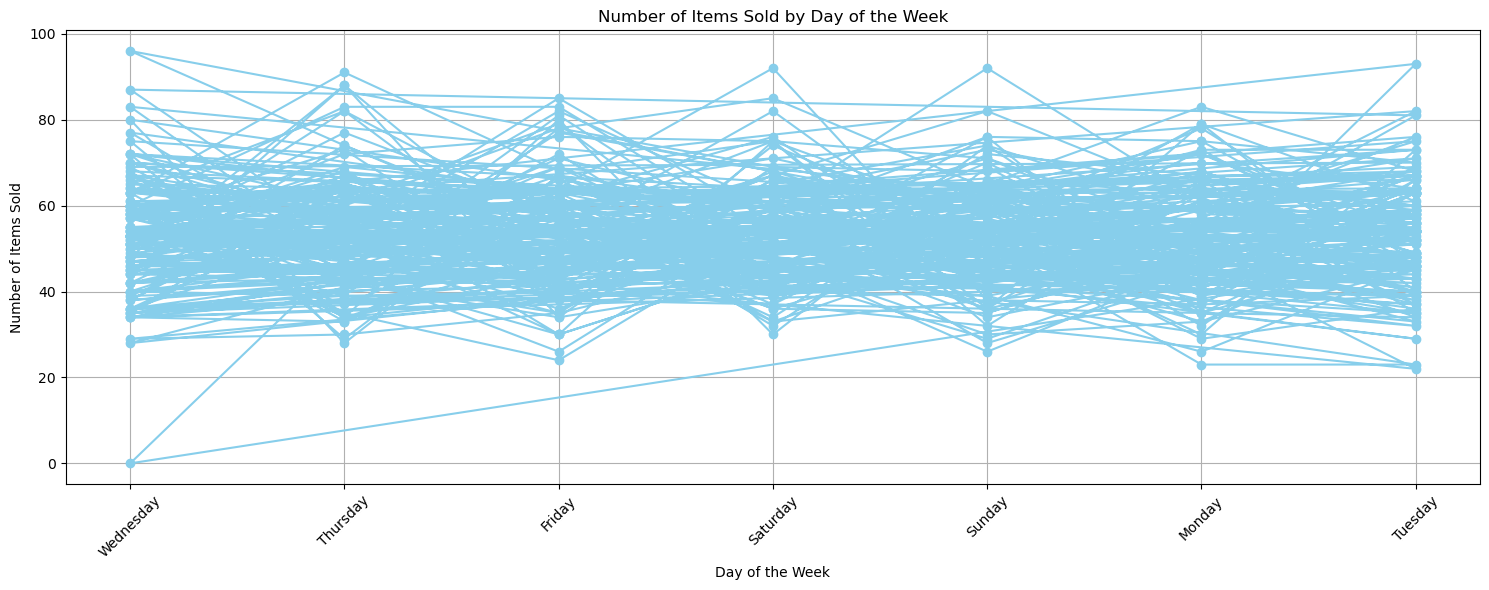

In [20]:
# Group transactions by day of the week and count the number of transactions for each day
transaction_freq_by_day = df.resample("D", on='Date')["itemDescription"].count()

# Extract day names from the index to use as x-axis labels
day_names = transaction_freq_by_day.index.day_name()

# Create a plot to visualize transaction frequency by day of the week
plt.figure(figsize=(15, 6))
plt.plot(day_names, transaction_freq_by_day.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Items Sold')
plt.title('Number of Items Sold by Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(True)
plt.show()


In [21]:
df_level = df[["Member_number", "itemDescription"]].sort_values(by= "Member_number", ascending = False)
df_level["itemDescription"] = df_level["itemDescription"].str.strip()
df_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [22]:
# Count the number of items bought by each customer
items_bought_by_cust= df.groupby('Member_number')['itemDescription'].count().reset_index()

# Sort the customers by the number of items bought (descending order)
cust_Level = items_bought_by_cust.sort_values(by='itemDescription', ascending=False)

print(cust_Level)

      Member_number  itemDescription
2120           3180               36
2665           3737               33
1994           3050               33
1026           2051               33
2838           3915               31
...             ...              ...
2462           3533                2
1265           2302                2
3723           4824                2
81             1084                2
2311           3377                2

[3898 rows x 2 columns]


In [23]:
df['single_transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)

df.tail()

,Member_number,Date,itemDescription,single_transaction
38760,4471,2014-10-08,sliced cheese,4471_2014-10-08
38761,2022,2014-02-23,candy,2022_2014-02-23
38762,1097,2014-04-16,cake bar,1097_2014-04-16
38763,1510,2014-12-03,fruit/vegetable juice,1510_2014-12-03
38764,1521,2014-12-26,cat food,1521_2014-12-26


I need to pivot this table to convert the items into columns and the transaction into rows:

In [24]:
df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])
df2

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-03-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It reveals how items are associated or co-occur within single transactions. Each cell in the table represents the count of occurrences where a specific item appears in transactions marked as 'single_transaction.'

Identify which items are frequently bought together in single transactions. High counts in specific cells suggest strong associations or co-occurrences of items within these transactions.

There are over a hundred columns while most people only shop for 2-3 items, which is why this table is sparse and mostly comprised of zeroes.The final data pre-processing step involves encoding all values in the above data frame to 0 and 1.

In [25]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
product_input = df2.applymap(encode)

In [26]:
pip install mlxtend 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### The Apriori Algorithm for Market Basket Analysis

In [27]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(product_input, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
2,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
3,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525


The association rules, specifically the "antecedents" and "consequents" columns, display items frequently bought together. and these associations aid in strategic product placement or targeted marketing strategies.

Support, Confidence, and Lift: Sorting the dataset by these metrics provides further insights.

Support: Indicates the frequency of occurrence for a particular itemset in the dataset.
Confidence: Measures the reliability of the rule. Higher confidence suggests stronger relationships between antecedents and consequents.
Lift: Measures how much more likely the items are purchased together than expected by chance. Lift values >1 indicate stronger associations.


To get the most frequent item combinations in the entire dataset, I sorted the dataset by support, confidence, and lift:

In [28]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
3,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
2,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


The resulting table shows that the four most popular product combinations that are frequently bought together are:

Rolls and milk

Yogurt and milk

Sausages and milk

from the above, Rolls, Milk, Yogurt, Sausages etc should be place close to one another, inorder to increase sales/Profit

### General Findings and Insights

1.The plot showcases how transaction frequency fluctuates over time. It reveal recurring patterns, such as daily, weekly, or monthly trends in transaction volumes. For instance, I observed regular peaks during weekends or specific days of the week.

2.I observe the periods of increased/decreased in transaction activity which indicate seasonal trends. These trends correspond to holiday seasons, promotional events, or certain months where sales are consistently higher or lower.

3.The plot showcases the number of items sold per month, allowing for the observation of any trends or fluctuations in sales over the months. It helps in understanding which months witness higher or lower sales volumes.

4.Identifying peaks or drops in item sales across different months can indicate seasonal patterns. For instance, There was higher sales in of months January and August correspond to holiday seasons or promotional periods, while lower sales align with quieter business periods.

5.The plot shows the number of items sold per week,I observed the sales trends at a more granular level. This granularity reveal short-term fluctuations or patterns that might not be visible at a monthly level.




#### Recommendation/Conclusion:
The utilization of the Apriori algorithm for market basket analysis on our retail dataset has yielded valuable insights.its shows the ease of implementation and interpretation, it has empowered us to derive meaningful association rules. These rules shed light on customer purchase behaviors, unveiling valuable connections between products frequently bought together.

The insights derived from this analysis offer a data-driven foundation for making strategic marketing decisions. By understanding which products tend to co-occur in customer transactions, by Leveraging these findings, we can tailor our marketing campaigns, product placement strategies, and promotions to better cater to customer preferences and enhance their shopping experience.

